In [84]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
# import graphviz
import matplotlib.pyplot as plt

# Load and Pre-Process the Data

In [85]:
df = pd.read_csv('../data/founder_V0.3_founder.csv')

In [86]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Full_Name', 'Primary_Job_Title', 'Bio', 'Gender',
       'Number_of_News_Articles', 'Number_of_Founded_Organizations',
       'Number_of_Portfolio_Companies', 'Number_of_Investments_x',
       'Number_of_Partner_Investments', 'Number_of_Lead_Investments_x',
       'Number_of_Exits_x', 'Number_of_Events_x', 'Categories',
       'Headquarters_Location_', 'Operating_Status', 'Founded_Date',
       'Closed_Date', 'Company_Type', 'Number_of_Founders', 'Success',
       'Founder'],
      dtype='object')

In [87]:
df.shape

(18361, 21)

# Normalization

In [88]:
df['Number_of_News_Articles'] = df['Number_of_News_Articles']/df['Number_of_News_Articles'].max()

In [89]:
df['Number_of_Founded_Organizations'] = df['Number_of_Founded_Organizations']/df['Number_of_Founded_Organizations'].max()

In [90]:
df['Number_of_Portfolio_Companies'] = df['Number_of_Portfolio_Companies']/df['Number_of_Portfolio_Companies'].max()

In [91]:
df['Number_of_Investments_x'] = df['Number_of_Investments_x'] / df['Number_of_Investments_x'].max()

In [92]:
df['Number_of_Partner_Investments'] = df['Number_of_Partner_Investments'] /df['Number_of_Partner_Investments'].max()

In [93]:
df['Number_of_Lead_Investments_x'] = df['Number_of_Lead_Investments_x']/ df['Number_of_Lead_Investments_x'].max()

In [94]:
df['Number_of_Exits_x'] = df['Number_of_Exits_x'] / df['Number_of_Exits_x'].max()

In [95]:
df['Number_of_Events_x'] = df['Number_of_Events_x']/ df['Number_of_Events_x'].max()

### Convert HQ Locations to Frequency of that Location Across the Dataset

In [96]:
hq_subset = df['Headquarters_Location_'].value_counts().reset_index(name = 'count').rename(columns = {'index':'Headquarters_Location_'})
hq_subset = pd.DataFrame(hq_subset)
print(hq_subset.head(10))


  Headquarters_Location_  count
0             California   6592
1               New York   1947
2         United Kingdom   1062
3                  India    934
4          Massachusetts    736
5                 Canada    503
6                Germany    449
7                 Israel    433
8                  Texas    337
9             Washington    322


In [97]:
df = pd.merge(df, hq_subset, on='Headquarters_Location_', how="left")
df.tail(5)

,Full_Name,Primary_Job_Title,Bio,Gender,Number_of_News_Articles,Number_of_Founded_Organizations,Number_of_Portfolio_Companies,Number_of_Investments_x,Number_of_Partner_Investments,Number_of_Lead_Investments_x,...,Categories,Headquarters_Location_,Operating_Status,Founded_Date,Closed_Date,Company_Type,Number_of_Founders,Success,Founder,count
18356,Glenn Shimkus,Co-founder & CEO,0,1,0.0,0.076923,0.0,0.0,0.0,0.0,...,"Document Management, Transaction Processing, R...",Illinois,1,2009,0,0,2,1,1,273
18357,Douglas Keszler,Co-Founder,0,1,0.0,0.076923,0.0,0.0,0.0,0.0,...,"Semiconductor, Electronics, Manufacturing",Oregon,1,2007,0,1,2,1,1,80
18358,Clark Johannson,Co-Founder & Chief Technology Officer,0,1,0.0,0.076923,0.0,0.0,0.0,0.0,...,"Peer to Peer, Construction, Social Network",Canada,1,2015,0,1,3,0,1,503
18359,Stefano Colonna,Founder,Digital serial entrepreneur. Founded and mana...,1,0.0,0.076923,0.0,0.0,0.0,0.0,...,"E-Commerce, Mobile, Mobile Payments",Massachusetts,1,2009,0,1,1,0,1,736
18360,Daniel Hoepfner,Founder,Daniel Hoepfner is founder and managing direct...,1,0.0,0.153846,0.0,0.0,0.0,0.0,...,"Content Marketing, Mobile, Publishing, Digital...",Germany,1,2011,0,1,2,0,1,449


In [98]:
# set Headquarters_Location_ equal to the count column
df['Headquarters_Location_'] = df['count']
df = df.drop(['count', 'Closed_Date', 'Full_Name', 'Founder', 'Bio', 'Categories'], axis = 1)
df['Gender'] = df['Gender'].astype(int)


In [101]:
df['Gender'].value_counts() # 131 people responded 2
index_names = df[df["Gender"] == 2].index
df.drop(index_names, inplace=True)

In [106]:
clean_df = pd.DataFrame(df)
clean_df.shape

(18230, 16)

In [9]:
print(filtered_df.shape)
if '0' in filtered_df.columns:
    print('T')

(18361, 9)


In [10]:
categories = df['Categories']
split_categories = categories.str.split(',', expand=True)
categories_firstCol = split_categories.iloc[:, 0]
category_type_dummies = pd.get_dummies(categories_firstCol)
print(category_type_dummies.shape)

(18361, 584)


In [11]:
filtered_df = pd.concat([filtered_df, category_type_dummies], axis=1)
print(filtered_df.shape)
for colName in filtered_df.columns:
    if colName == '0':
        print('True')

filtered_df = filtered_df.drop(['0'], axis = 1)
print(filtered_df.shape)

(18361, 593)
True
(18361, 592)


In [12]:
hq = df['Headquarters_Location_']
hq_dummies = pd.get_dummies(hq)
print(hq_dummies.shape)

hq_dummies = hq_dummies.drop(['0'], axis = 1)
print(hq_dummies.shape)

(18361, 142)
(18361, 141)


In [13]:
filtered_df = pd.concat([filtered_df, hq_dummies], axis=1)
print(filtered_df.shape)

(18361, 733)


In [14]:
# Drop the initial columns
filtered_df = filtered_df.drop(['Headquarters_Location_', 'Categories'], axis=1)
print(filtered_df.columns[:25])
# filtered_df = filtered_df.drop(['0'], axis = 1)
print(filtered_df.shape)

Index(['Gender', 'Number_of_News_Articles', 'Number_of_Founded_Organizations',
       'Number_of_Exits_x', 'Operating_Status', 'Number_of_Founders',
       'Success', '3D Printing', '3D Technology', 'A/B Testing', 'Accounting',
       'Ad Network', 'Ad Retargeting', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Affiliate Marketing', 'AgTech', 'Agriculture',
       'Air Transportation', 'Alternative Medicine'],
      dtype='object')
(18361, 731)


# Inspecting the Dataset

In [15]:
y = filtered_df['Success'].values
X = filtered_df.drop('Success', axis=1)
print("Shape of X: " + str(X.values.shape))
print("Shape of y: " + str(y.shape))


Shape of X: (18361, 730)
Shape of y: (18361,)


### Train & Test Split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123) 


### Create a dMatrix

### XGBoost

In [52]:
# instantiate
xgb_reg = xgb.XGBRegressor(objective='binary:logistic', learning_rate=.3, colsample_bytree=.3, reg_alpha= 9)

# fit the model to training data
xgb_reg.fit(x_train, y_train)

# y prediction
y_pred_xgb = xgb_reg.predict(x_test)

xgb_score_TEST = accuracy_score(y_test, y_pred_xgb.round())

print("XGB testing data accuracy: " + str(xgb_score_TEST))

XGB testing data accuracy: 0.6966781630059902


In [53]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("RMSE: " + str(rmse))
print("MSE: " + str(mean_squared_error(y_test, y_pred_xgb)))

RMSE: 0.4494758165169884
MSE: 0.20202850963361346


In [54]:
params = {
    "objective": "binary:logistic", # classification, dependent has two levels 0 and 1
    "colsame_bytree": .3,
    "learning_rate": .3,
    "reg_alpha":9,
}

cv_results = xgb.cv(dtrain = data_dMatrix, params=params, nfold = 5, metrics="rmse", num_boost_round = 50, early_stopping_rounds = 5,as_pandas = True)

In [55]:
print(cv_results['test-rmse-mean'].tail(1))

49    0.451171
Name: test-rmse-mean, dtype: float64


In [43]:
xgb_reg = xgb.train(params=params, dtrain= data_dMatrix, num_boost_round=10)

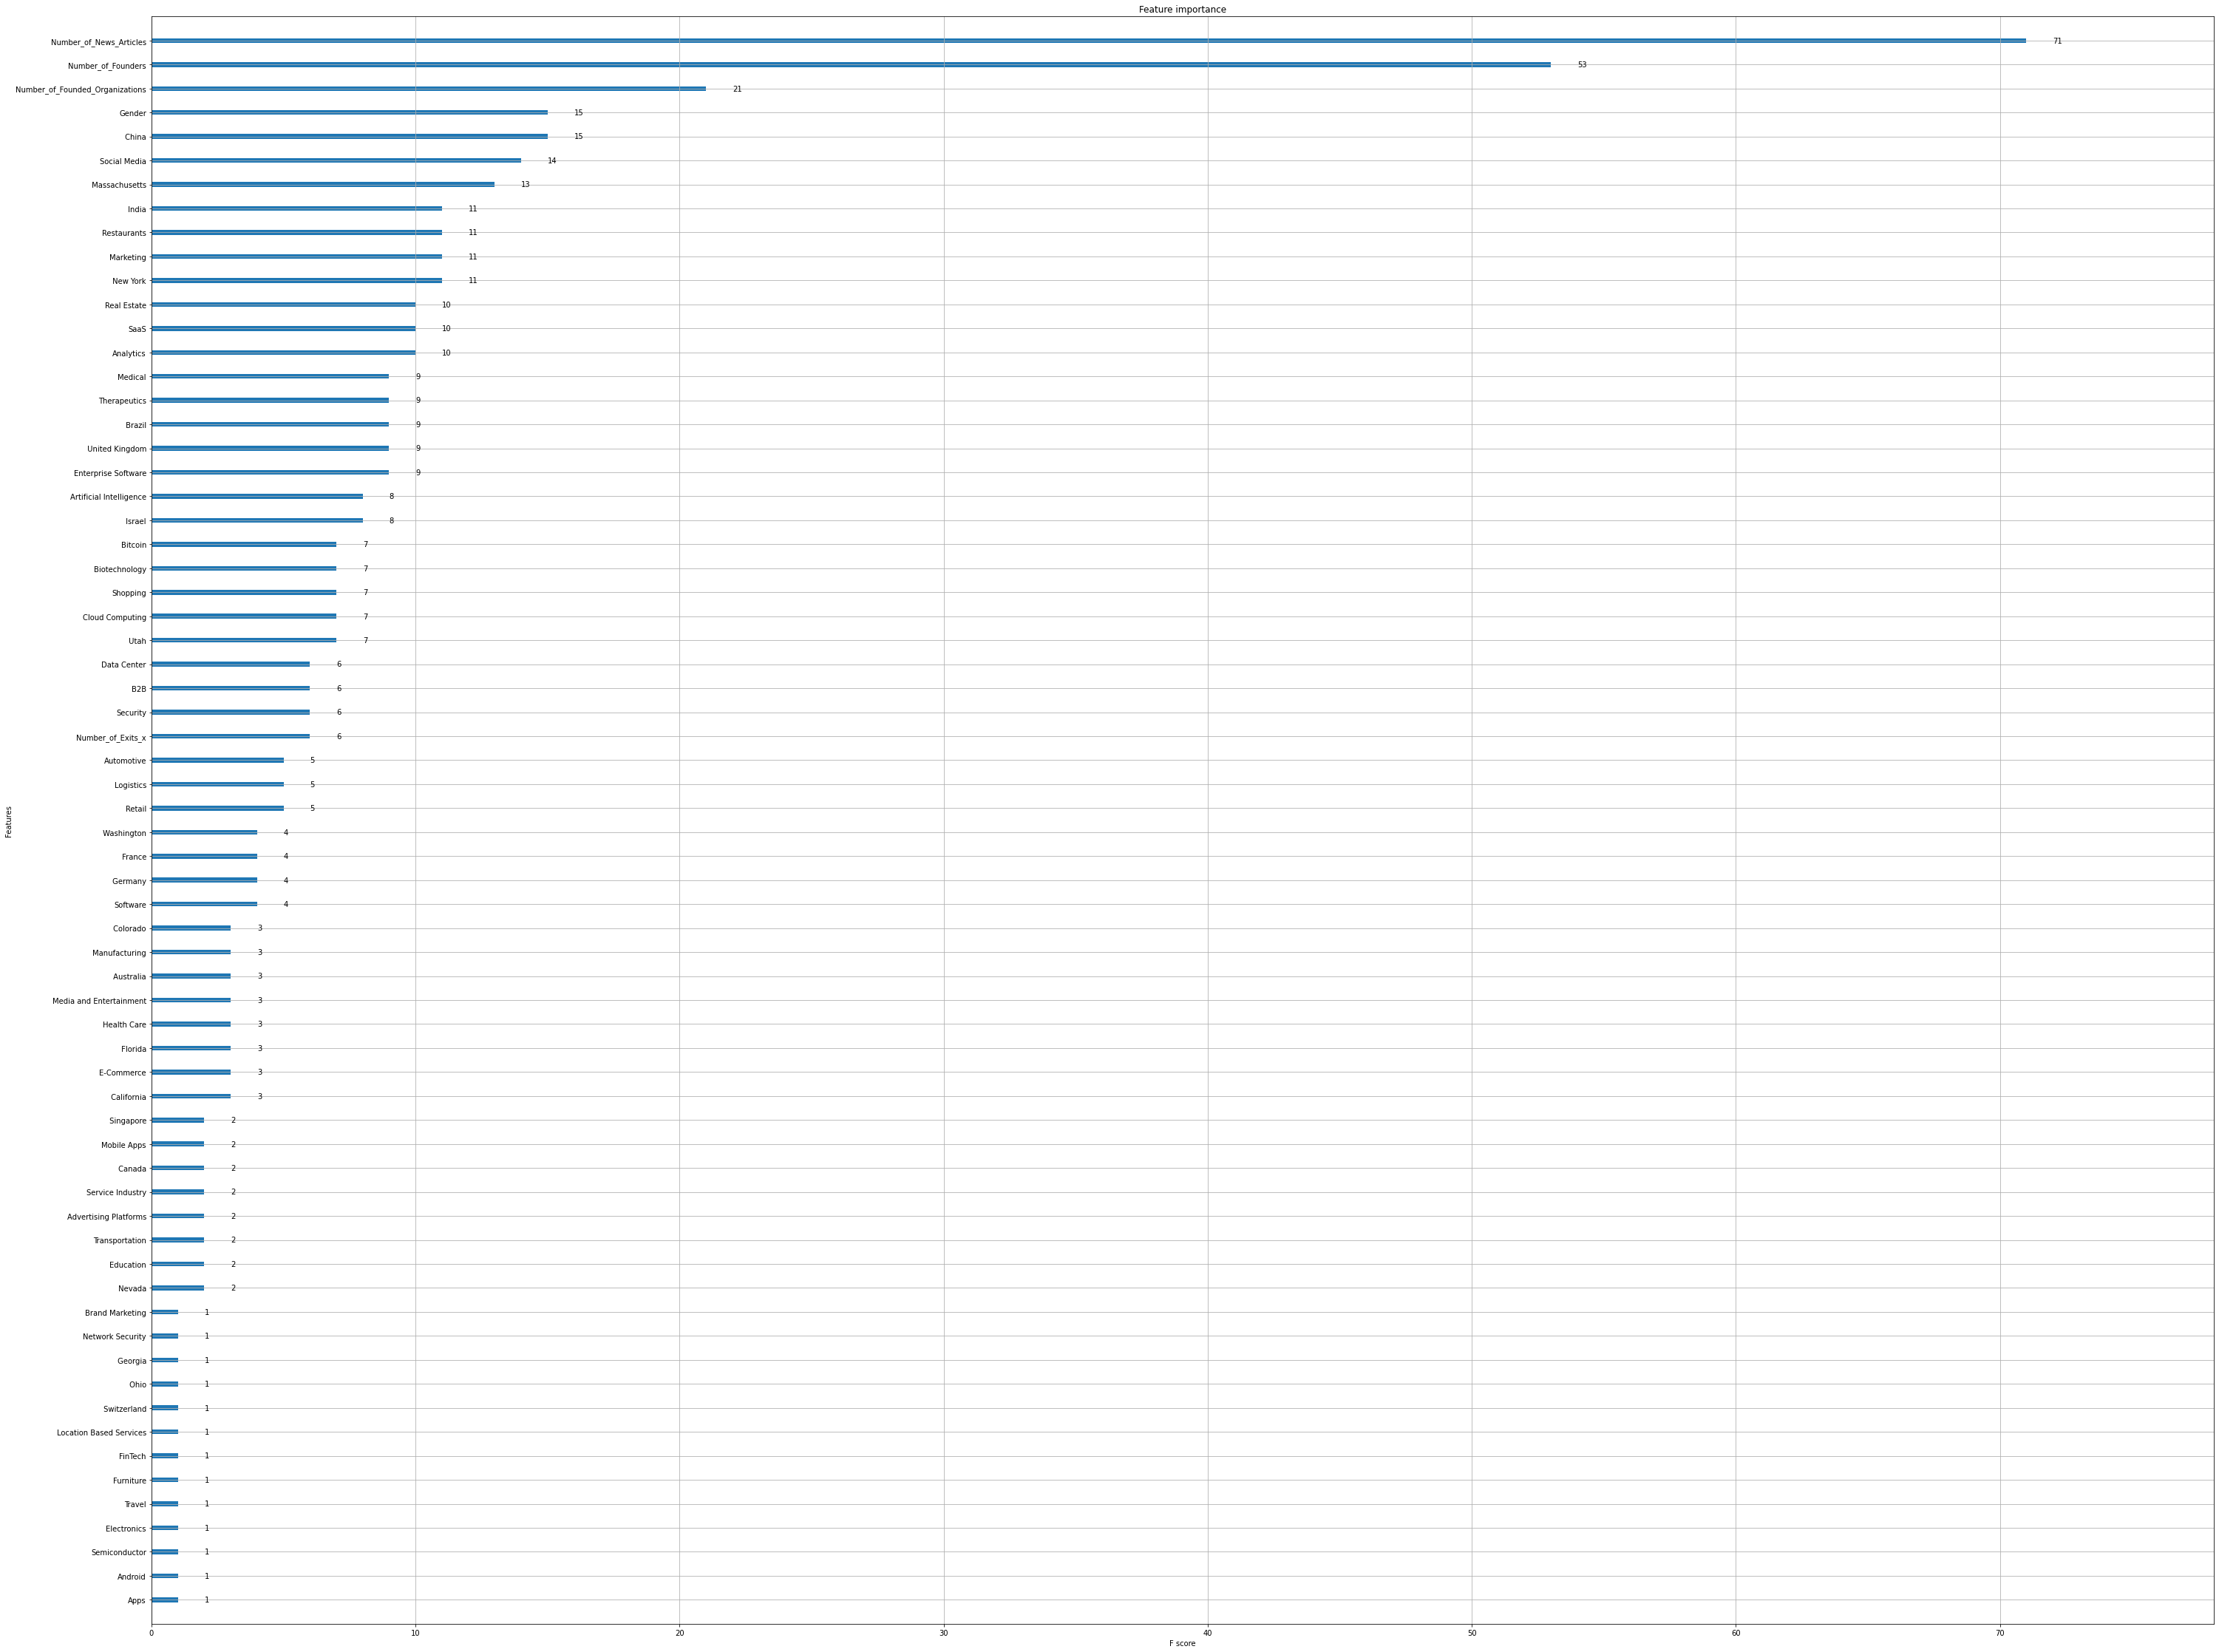

In [58]:
xgb.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [50, 40]
plt.show()